In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path
import json
import requests


In [2]:
#Creating path

csvpath1= Path("Resources/nba.csv")
csvpath2= Path("Resources/Playoffs.csv")
csvpath3= Path("Resources/Regular_Season.csv")

#Reading the csv files 

nba_df= pd.read_csv(csvpath1)
playoffs_df= pd.read_csv(csvpath2)
reg_season_df= pd.read_csv(csvpath3)

In [3]:
#Renaming columns in nba_df, playoffs_df and reg_season_df

nba_df= nba_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})

playoffs_df= playoffs_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})

reg_season_df= reg_season_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})


In [4]:
#checking for null values in the 3 dfs

nullone= pd.isnull(nba_df)
nulltwo= pd.isnull(playoffs_df)
nullthree= pd.isnull(reg_season_df)

# Dropping any null values

nba_df= nba_df.dropna()
playoffs_df= playoffs_df.dropna()
reg_season_df= reg_season_df.dropna()

# No null values found and dropped

In [5]:
# Dropping the first column in playoffs_df and first 2 columns in reg_season_df 

playoffs_df = playoffs_df.drop("Unnamed: 0.1", axis=1)
reg_season_df= reg_season_df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)


# Replacing "Regular%20Season" value in season_type column in  nba_df to "Regular"

nba_df['Season_type'] = nba_df['Season_type'].replace('Regular%20Season', 'Regular')


# Replacing "Regular_Season" value in season_type column in reg_seasons_df to "Regular"

reg_season_df['Season_type'] = reg_season_df['Season_type'].replace('Regular_Season', 'Regular')

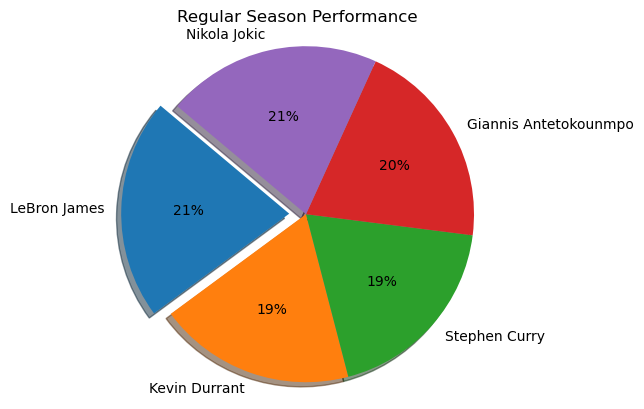

In [6]:
#Finding the players with number 1 rank in the nba_dataset
ranks= nba_df.loc[nba_df["Rank"]==1]

#Choosing 5 random players from ranks.
 
top_5= ["LeBron James", "Kevin Durrant", "Stephen Curry", "Giannis Antetokounmpo", "Nikola Jokic"]

#3 offensive metrics (Points, AST, FGA) AND 3 defensive metrics (REB,STL,BLK)
performance_metrics= ["PTS", "AST", "FGA", "REB", "STL", "BLK"]

#REGULAR SEASON CALCULATION FOR TOP 5 PLAYERS 

#We look up each players 5 performance metrics as mentioned above. Then calculated the horizontal average across those 6 columns
# and created a new column to store that calculation with the column name of Average Stats.

LeBron_James = reg_season_df.loc[reg_season_df['Player'] == 'LeBron James', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
LeBron_James['Average Stats'] = LeBron_James[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
leb= LeBron_James["Average Stats"].mean()

Kevin_Durrant = reg_season_df.loc[reg_season_df['Player'] == 'Kevin Durant', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Kevin_Durrant['Average Stats'] = Kevin_Durrant[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
kev= Kevin_Durrant["Average Stats"].mean()

stephen_curry = reg_season_df.loc[reg_season_df['Player'] == 'Stephen Curry', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
stephen_curry['Average Stats'] = stephen_curry[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
steph= stephen_curry["Average Stats"].mean()

Giannis_Antetokounmpo = reg_season_df.loc[reg_season_df['Player'] == 'Giannis Antetokounmpo', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Giannis_Antetokounmpo['Average Stats'] = Giannis_Antetokounmpo[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
gian= Giannis_Antetokounmpo["Average Stats"].mean()

Nikola_Jokic = reg_season_df.loc[reg_season_df['Player'] == 'Nikola Jokic', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Nikola_Jokic['Average Stats'] = Nikola_Jokic[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
nik= Nikola_Jokic["Average Stats"].mean()

performance_regular= [leb,kev,steph,gian,nik]
explode= [0.1,0,0,0,0]
plt.pie(performance_regular, explode=explode, labels=top_5,
        autopct="%1.0f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("Regular Season Performance")
plt.savefig("Figures/Regular_Season_Performance_Top5.png")
plt.show()

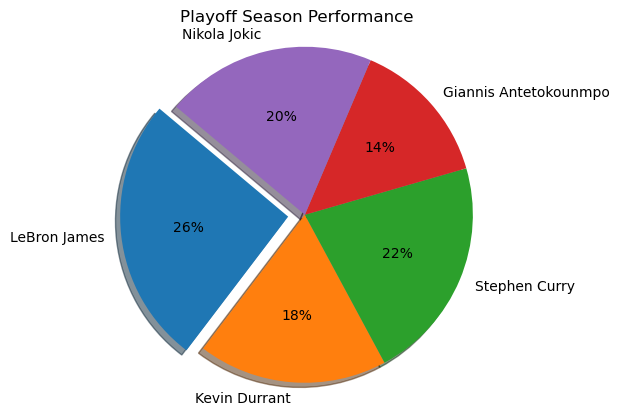

In [7]:
# Question 1: What is the difference in performance of the top 5 players in regular and playoff seasons?
# Show their comparison.  

#Finding the players with number 1 rank in the nba_dataset
ranks= nba_df.loc[nba_df["Rank"]==1]

#Choosing 5 random players from ranks.
 
top_5= ["LeBron James", "Kevin Durrant", "Stephen Curry", "Giannis Antetokounmpo", "Nikola Jokic"]

#3 offensive metrics (Points, AST, FGA) AND 3 defensive metrics (REB,STL,BLK)
performance_metrics= ["PTS", "AST", "FGA", "REB", "STL", "BLK"]

#PLAYOFFS SEASON CALCULATION FOR TOP 5 PLAYERS 
# We look up each players 5 performance metrics as mentioned above. Then calculated the horizontal average across those 6 columns
# and created a new column to store that calculation with the name of Average Stats. 

LeBron_James = playoffs_df.loc[playoffs_df['Player'] == 'LeBron James', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
LeBron_James['Average Stats'] = LeBron_James[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
lebron= LeBron_James['Average Stats'].mean()

Kevin_Durrant = playoffs_df.loc[playoffs_df['Player'] == 'Kevin Durant', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Kevin_Durrant['Average Stats'] = Kevin_Durrant[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
kevin= Kevin_Durrant['Average Stats'].mean()


stephen_curry = playoffs_df.loc[playoffs_df['Player'] == 'Stephen Curry', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
stephen_curry['Average Stats'] = stephen_curry[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
curry= stephen_curry['Average Stats'].mean()

Giannis_Antetokounmpo = playoffs_df.loc[playoffs_df['Player'] == 'Giannis Antetokounmpo', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Giannis_Antetokounmpo['Average Stats'] = Giannis_Antetokounmpo[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
giannis= Giannis_Antetokounmpo['Average Stats'].mean()


Nikola_Jokic =playoffs_df.loc[playoffs_df['Player'] == 'Nikola Jokic', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Nikola_Jokic['Average Stats'] = Nikola_Jokic[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
nikola= Nikola_Jokic['Average Stats'].mean()

performance= [lebron, kevin, curry, giannis, nikola]
explode= [0.1,0,0,0,0]

plt.pie(performance, explode=explode, labels=top_5,
        autopct="%1.0f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("Playoff Season Performance")
plt.savefig("Figures/Playoff_Season_Performance_Top5.png")
plt.show()


Looking at the 2 visualization above, it seems like LeBron's performance was the best in both seasons with 25.8% in playoffs which explains his best performance in playoffs and 21.2% in regular season. Next we have Nikola Jokic at 20.7% performance in Regular season and 20.3% in playoff season which is a consistent performance in both seasons. Similar to him is Kevin Durant whose performance is 18.9% in regular season and 18.2% in playoffs which is another player with consistent performance. Moving forward, Stephen Curry's performance was better in playoff season with 21.6% and with 18.9% in regular season. Lastly, Giannis Antetokounmpo was a more efficient performer in regular season with 20.2% and 14.1% in playoff season. Overall, LeBron James seems to be the best performer in both seasons and Nikola Jokic and Kevin Durant show similar performance in both seasons.  

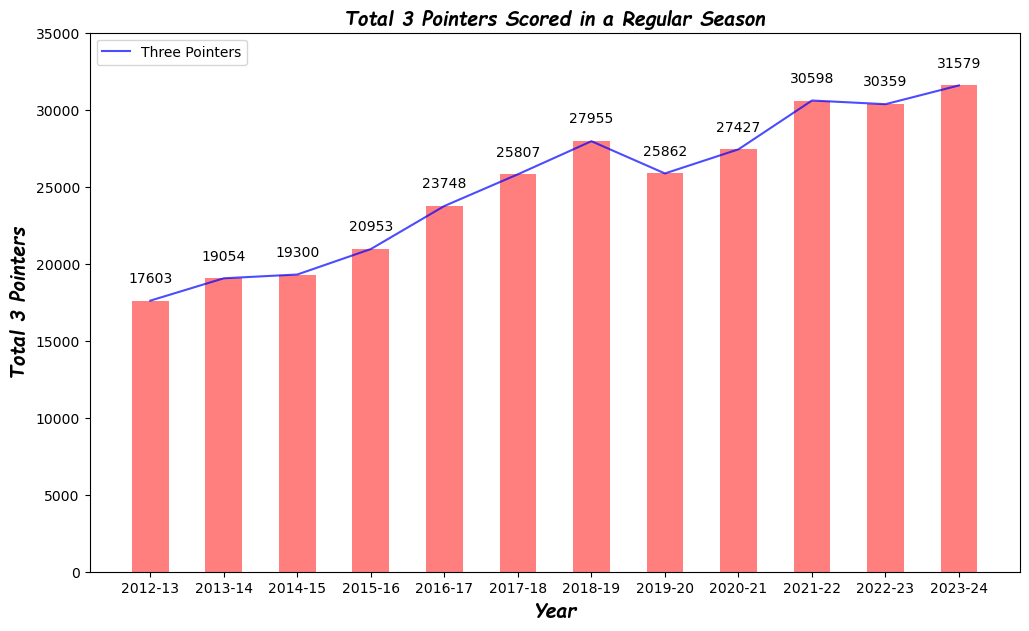

In [8]:
# Question 2: How 3 pointers in both season types over years 2012-2024 changed the scoring trends of NBA? 

# Calculating Three Pointers Points for Regular Season
reg_year = reg_season_df['Year'].unique()  # reg_year is the unique years for the regular season

reg_year_grouped = reg_season_df.groupby('Year')  # reg_year_grouped is the grouped years. The result is a DataFrameGroupBy object.

reg_three_points = reg_year_grouped['FG3M'].sum()  # reg_three_points is the total number of three-pointers scored in a regular season.

reg_three_df = pd.DataFrame(reg_three_points)

# 1st visualization: Total Three-pointers scored in Regular Season.

plt.figure(figsize=(12, 7))
plt.plot(reg_year, reg_three_df['FG3M'], label='Three Pointers', color='b', alpha = 0.7)
plt.bar(reg_year, reg_three_df['FG3M'], color='r', alpha=0.5, width=0.5)

for i, value in enumerate(reg_three_df['FG3M']):
    plt.text(i, value + 1000, str(value), ha = 'center', va = 'bottom')

plt.xlabel('Year', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.ylabel('Total 3 Pointers', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.title('Total 3 Pointers Scored in a Regular Season', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.legend().set_loc('upper left')
plt.ylim(0, 35000)
plt.savefig("Figures/Total Three Pointers Scored in a Regular Season.png")
plt.show()

# Markdown of the above Graph (Total_3_Pointers_Scored_in_a_Regular_Season). Explain the statistics

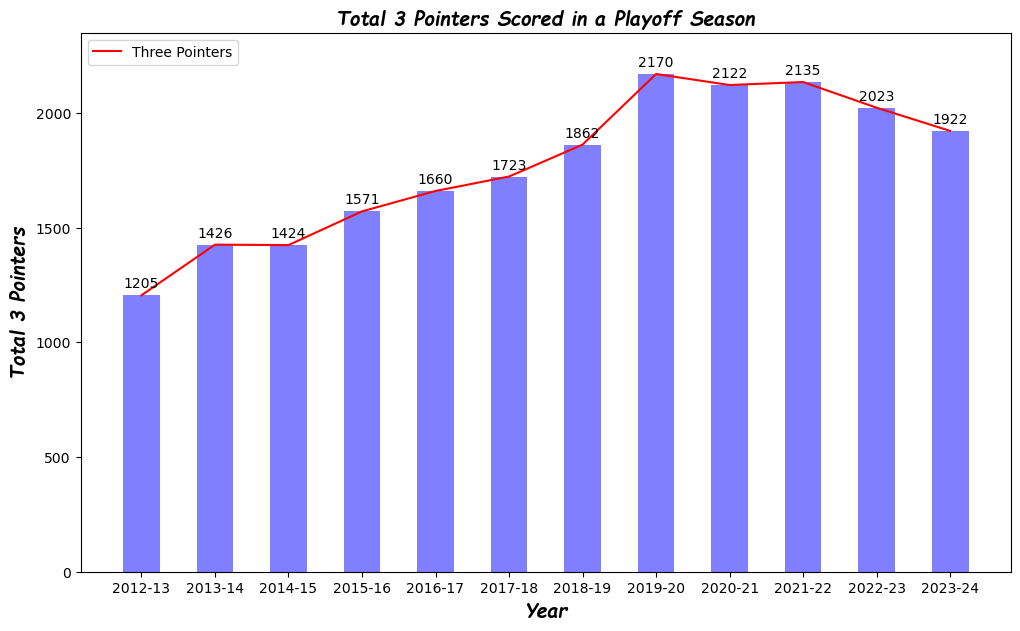

In [9]:
# Calculating Three Pointers Points for Playoffs Season

po_year = playoffs_df['Year'].unique()                      # po_year is the unique years for playoffs season

po_year_grouped = playoffs_df.groupby('Year')               # po_year_grouped is the grouped years. The result is DataFrameGroupBy object.

po_three_points = po_year_grouped['FG3M'].sum()             # po_three_points is the total number of three pointers scored in a playoffs season.

po_three_df = pd.DataFrame(po_three_points)

# 2nd visualization: Total Three pointers scored in Playoffs Season.

plt.figure(figsize=(12,7))
plt.plot(po_year, po_three_df['FG3M'], label='Three Pointers', color = 'r')
plt.bar(po_year, po_three_df['FG3M'], color= 'b', alpha = 0.5, width = 0.5)

for j, value in enumerate(po_three_df['FG3M']):
    plt.text(j, value+20, str(value), ha = 'center', va = 'bottom')

plt.xlabel('Year', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.ylabel('Total 3 Pointers', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.legend().set_loc('upper left')
plt.title('Total 3 Pointers Scored in a Playoff Season', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.savefig("Figures/Total Three Pointers Scored in a Playoff Season.png")
plt.ylim(0, 2350)
plt.show()

# Markdown of the above Graph(Total 3 Pointers Scored in a Playoff Season). Explain the statistics

In [10]:
# What is the Question below?

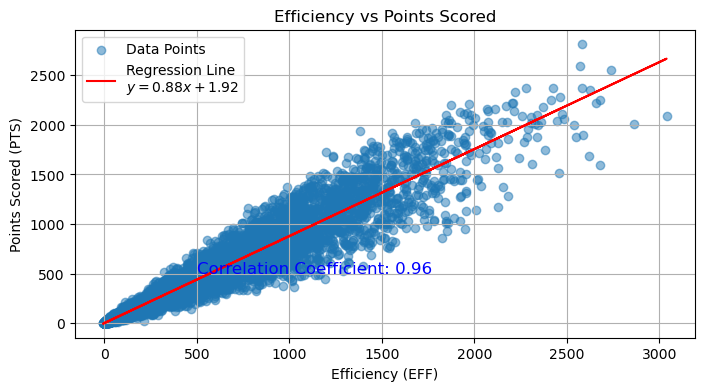

The Correlation Coefficient of Efficiency vs Points Scored is: 0.96
The p-value is: 0.0


In [11]:

# Select the variables: Efficiency (EFF) and Points (PTS)
x_eff = nba_df['EFF']
y_pts = nba_df['Points']

# Calculate the correlation coefficient for Efficiency and Points
correlation_coefficient_eff_pts = np.corrcoef(x_eff, y_pts)[0, 1]

# Perform linear regression using scipy
slope_eff_pts, intercept_eff_pts, r_value_eff_pts, p_value_eff_pts, std_err_eff_pts = st.linregress(x_eff, y_pts)

# Create the regression line
regression_line_eff_pts = slope_eff_pts * x_eff + intercept_eff_pts

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 4))
plt.scatter(x_eff, y_pts, label='Data Points', alpha=0.5)
plt.plot(x_eff, regression_line_eff_pts, color='red', label=f'Regression Line\n$y={slope_eff_pts:.2f}x+{intercept_eff_pts:.2f}$')
plt.title('Efficiency vs Points Scored')
plt.xlabel('Efficiency (EFF)')
plt.ylabel('Points Scored (PTS)')
plt.legend()
plt.grid(True)

# Display the correlation coefficient on the plot
plt.text(500, 500, f'Correlation Coefficient: {correlation_coefficient_eff_pts:.2f}', fontsize=12, color='blue')

# Show the plot
plt.savefig("Figures/Efficiency vs Points.png")
plt.show()

print(f"The Correlation Coefficient of Efficiency vs Points Scored is: {round(correlation_coefficient_eff_pts,2)}")
print(f'The p-value is: {p_value_eff_pts}')

The correlation coefficient between player efficiency and player points is 0.92 which is extremely close to correlation coefficient of 1 which means a perfect correlation. The above graph illustrates close to perfect correlation between efficiency and points scored. Efficiency is a statistic used to measure a player's overall effectiveness in a game. This means that more efficient players tend to score more points. Hence, there is a very strong positive correlation between efficiency (EFF) and points (PTS). 
The p-value is 0.0 and since this is lower than 0.05. This suggests that the relationship between the efficiency (EFF) and points scored (PTS) is statistically significant. In other words, there's strong evidence to suggest that changes in EFF are associated with changes in PTS. 

In [12]:
# Question 3: Who are the most improved players over the last 10 years? 

# 1st visualization: Metrics: Points per minute played. Create a dataframe based on those metrics. 
# For each players calculate the points per minute played over 10 years and calculate an average for
# every player and choose the top 10 players with the highest average. 
# Build a bar plot with points per minute on the y-axis and players on the x-axis.



#Selecting columns needed

columns_to_keep = ["Year", "Season_type" , "Player_ID", "Player", "Team", "Minutes Played", "Points"]

# Use column indexing
best_player_df = nba_df[columns_to_keep]
best_player_df

,Year,Season_type,Player_ID,Player,Team,Minutes Played,Points
0,2012-13,Regular,201142,Kevin Durant,OKC,3119,2280
1,2012-13,Regular,977,Kobe Bryant,LAL,3013,2133
2,2012-13,Regular,2544,LeBron James,MIA,2877,2036
3,2012-13,Regular,201935,James Harden,HOU,2985,2023
4,2012-13,Regular,2546,Carmelo Anthony,NYK,2482,1920
...,...,...,...,...,...,...,...
8830,2023-24,Playoffs,1641765,Olivier-Maxence Prosper,DAL,9,0
8831,2023-24,Playoffs,1631115,Orlando Robinson,MIA,2,0
8832,2023-24,Playoffs,203933,T.J. Warren,MIN,11,0
8833,2023-24,Playoffs,201152,Thaddeus Young,PHX,4,0


In [13]:
#Adding Point per min column to the best dataframe

best_player_df.loc[:,'Points Per Min'] = best_player_df['Points'] / best_player_df['Minutes Played']
best_player_df

C:\Users\Koi Vi\AppData\Local\Temp\ipykernel_21796\2377169677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_player_df.loc[:,'Points Per Min'] = best_player_df['Points'] / best_player_df['Minutes Played']


,Year,Season_type,Player_ID,Player,Team,Minutes Played,Points,Points Per Min
0,2012-13,Regular,201142,Kevin Durant,OKC,3119,2280,0.731004
1,2012-13,Regular,977,Kobe Bryant,LAL,3013,2133,0.707932
2,2012-13,Regular,2544,LeBron James,MIA,2877,2036,0.707682
3,2012-13,Regular,201935,James Harden,HOU,2985,2023,0.677722
4,2012-13,Regular,2546,Carmelo Anthony,NYK,2482,1920,0.773570
...,...,...,...,...,...,...,...,...
8830,2023-24,Playoffs,1641765,Olivier-Maxence Prosper,DAL,9,0,0.000000
8831,2023-24,Playoffs,1631115,Orlando Robinson,MIA,2,0,0.000000
8832,2023-24,Playoffs,203933,T.J. Warren,MIN,11,0,0.000000
8833,2023-24,Playoffs,201152,Thaddeus Young,PHX,4,0,0.000000


In [14]:
#Arranging the Points per min by descending order

best_sorted = best_player_df.sort_values(by='Points Per Min', ascending=False)
best_sorted.set_index('Player_ID', inplace=True)
best_sorted

,Year,Season_type,Player,Team,Minutes Played,Points,Points Per Min
Player_ID,,,,,,,
1628513,2017-18,Regular,Naz Mitrou-Long,UTA,1,3,3.000000
1627098,2016-17,Playoffs,Malcolm Delaney,ATL,3,8,2.666667
201880,2014-15,Playoffs,Greg Stiemsma,TOR,2,5,2.500000
1628995,2021-22,Playoffs,Kevin Knox II,ATL,9,22,2.444444
203895,2015-16,Playoffs,Jordan McRae,CLE,4,9,2.250000
...,...,...,...,...,...,...,...
1628993,2019-20,Playoffs,Alize Johnson,IND,0,0,NaN
1629216,2019-20,Playoffs,Gabe Vincent,MIA,0,0,NaN
2199,2019-20,Playoffs,Tyson Chandler,HOU,0,0,NaN


In [15]:
#Dropping rows with null values

best_sorted.dropna(axis=0, how='any', inplace=False)

,Year,Season_type,Player,Team,Minutes Played,Points,Points Per Min
Player_ID,,,,,,,
1628513,2017-18,Regular,Naz Mitrou-Long,UTA,1,3,3.000000
1627098,2016-17,Playoffs,Malcolm Delaney,ATL,3,8,2.666667
201880,2014-15,Playoffs,Greg Stiemsma,TOR,2,5,2.500000
1628995,2021-22,Playoffs,Kevin Knox II,ATL,9,22,2.444444
203895,2015-16,Playoffs,Jordan McRae,CLE,4,9,2.250000
...,...,...,...,...,...,...,...
1630608,2023-24,Regular,Malcolm Cazalon,DET,3,0,0.000000
1629232,2023-24,Regular,Kaiser Gates,NOP,7,0,0.000000
1628382,2023-24,Regular,Justin Jackson,MIN,1,0,0.000000


In [16]:
#Removing playes with a low minutes playes value

threshold= 2000

df_filtered = best_player_df[best_player_df['Minutes Played'] >= threshold]
df_filtered

,Year,Season_type,Player_ID,Player,Team,Minutes Played,Points,Points Per Min
0,2012-13,Regular,201142,Kevin Durant,OKC,3119,2280,0.731004
1,2012-13,Regular,977,Kobe Bryant,LAL,3013,2133,0.707932
2,2012-13,Regular,2544,LeBron James,MIA,2877,2036,0.707682
3,2012-13,Regular,201935,James Harden,HOU,2985,2023,0.677722
4,2012-13,Regular,2546,Carmelo Anthony,NYK,2482,1920,0.773570
...,...,...,...,...,...,...,...,...
8198,2023-24,Regular,203484,Kentavious Caldwell-Pope,DEN,2402,766,0.318901
8200,2023-24,Regular,1628404,Josh Hart,NYK,2707,761,0.281123
8201,2023-24,Regular,1630183,Jaden McDaniels,MIN,2105,757,0.359620
8207,2023-24,Regular,1627936,Alex Caruso,CHI,2040,715,0.350490


In [17]:
#Creating a dataframe with the top 15 players

top15_df = df_filtered.nlargest(15, 'Points Per Min')
top15_df['Points Per Min'] = top15_df['Points Per Min'].round(2)
top15_df

,Year,Season_type,Player_ID,Player,Team,Minutes Played,Points,Points Per Min
4204,2018-19,Regular,201935,James Harden,HOU,2867,2818,0.98
7297,2022-23,Regular,203507,Giannis Antetokounmpo,MIL,2024,1959,0.97
7294,2022-23,Regular,203954,Joel Embiid,PHI,2284,2183,0.96
4946,2019-20,Regular,201935,James Harden,HOU,2483,2335,0.94
5692,2020-21,Regular,201939,Stephen Curry,GSW,2152,2015,0.94
2753,2016-17,Regular,201566,Russell Westbrook,OKC,2802,2558,0.91
6476,2021-22,Regular,203507,Giannis Antetokounmpo,MIL,2204,2002,0.91
6473,2021-22,Regular,203954,Joel Embiid,PHI,2296,2079,0.91
8049,2023-24,Regular,1629029,Luka Doncic,DAL,2624,2370,0.90
7295,2022-23,Regular,1629029,Luka Doncic,DAL,2391,2138,0.89


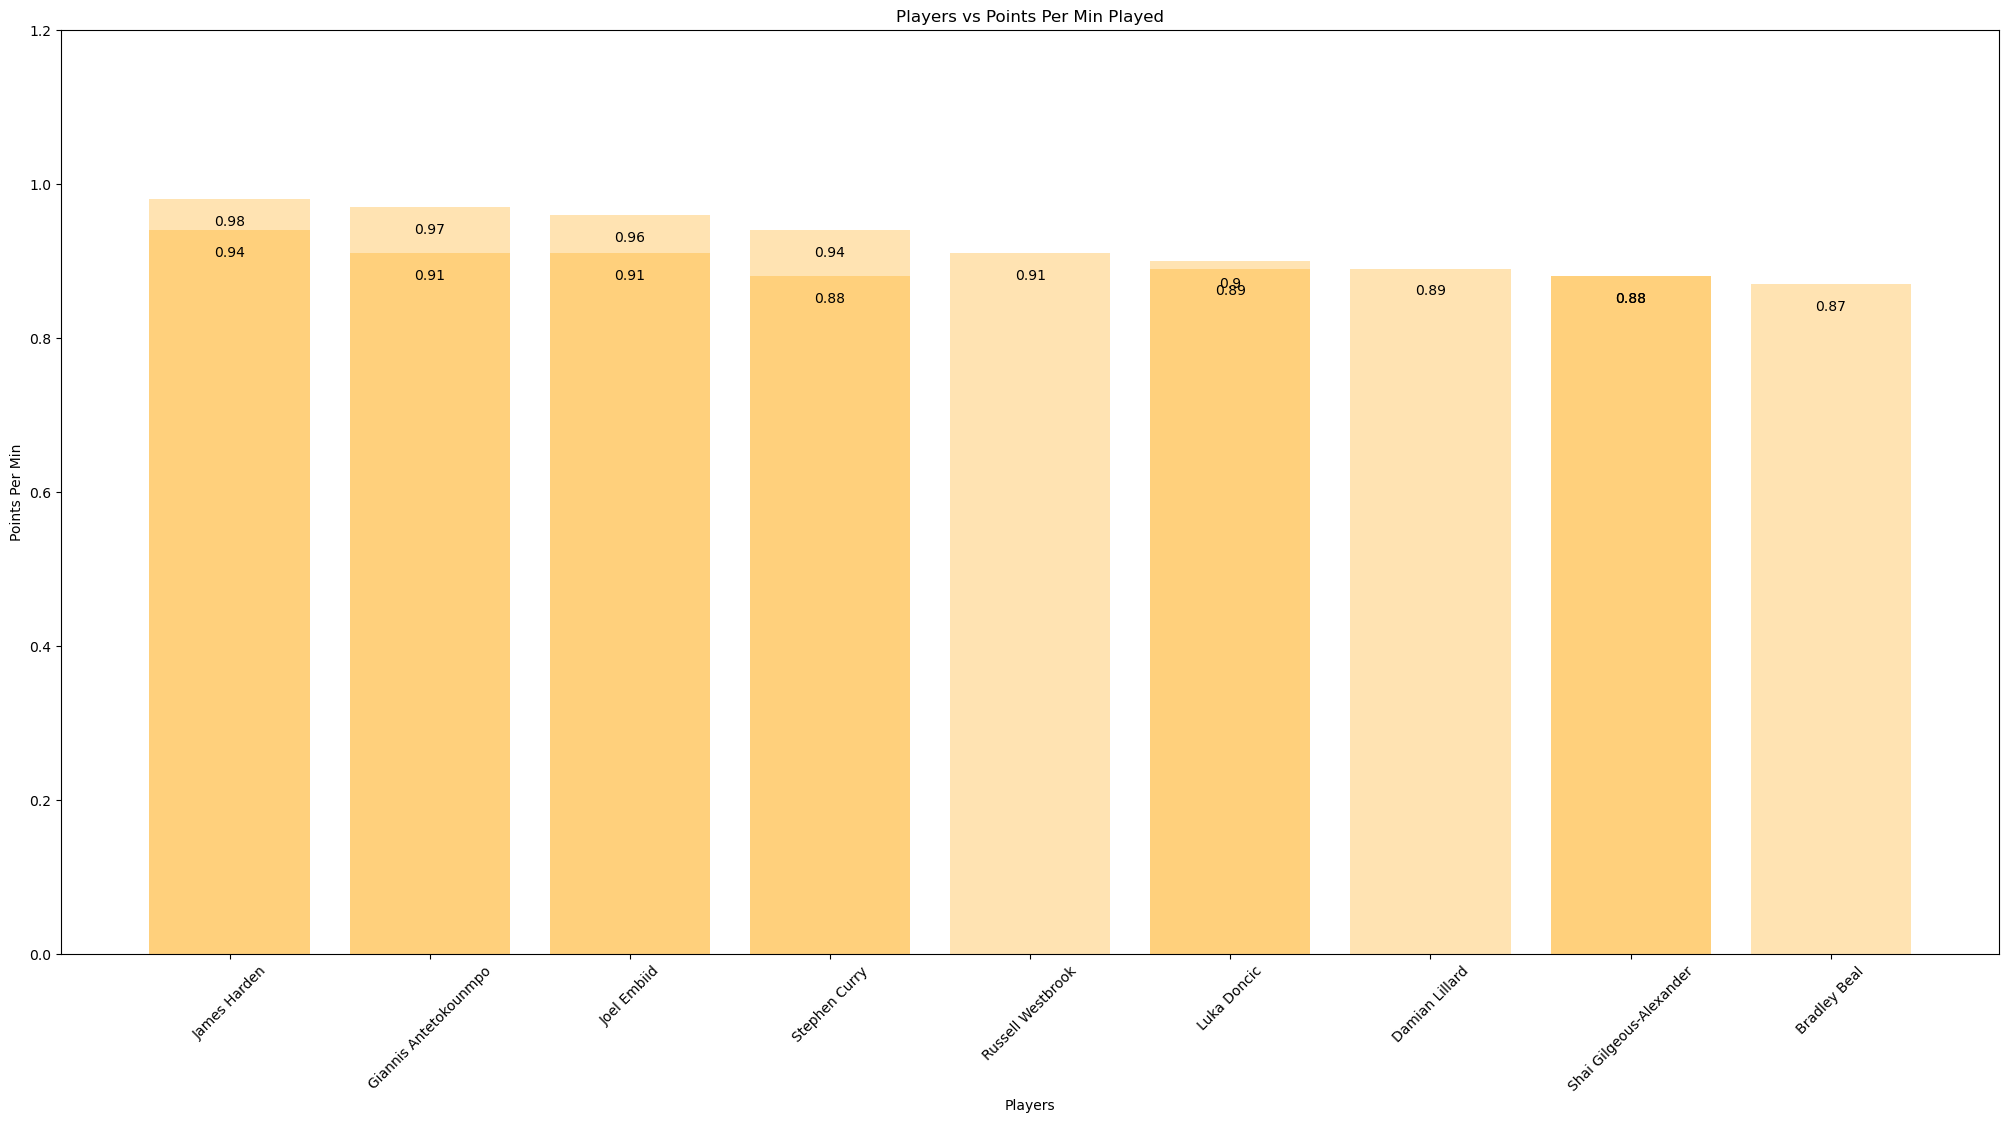

In [18]:
# Plotting a bar chart to represent the above dataframe

players = top15_df['Player']  
points_per_min = top15_df['Points Per Min']  

plt.figure(figsize=(25, 12))

# Create the bar chart
bars = plt.bar(players, points_per_min, color='orange', alpha= 0.3)

plt.ylim(0.0 , 1.2)  # Adjust the y-axis limit if needed

# Adding text labels on top of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.02, round(yval, 2),
             ha='center', va='top', color='black')

plt.xlabel('Players')
plt.ylabel('Points Per Min')
plt.title('Players vs Points Per Min Played')
plt.xticks(rotation=45)
plt.savefig("Figures/Players vs Points Per Min Played.png")
plt.show()

# Markdown for the above graph

In [19]:
# 2nd Visualization: 10 lines on a single line chart OR
# Scatter plot x-axis points per minute for each player , y-axis years and sizing by points per minute 
# played for each player. 

In [20]:
#Using 'groupby' function on the players to bring the playoff and regular season points together

scatter_df = best_sorted.groupby('Player')
scatter_df.head()


,Year,Season_type,Player,Team,Minutes Played,Points,Points Per Min
Player_ID,,,,,,,
1628513,2017-18,Regular,Naz Mitrou-Long,UTA,1,3,3.000000
1627098,2016-17,Playoffs,Malcolm Delaney,ATL,3,8,2.666667
201880,2014-15,Playoffs,Greg Stiemsma,TOR,2,5,2.500000
1628995,2021-22,Playoffs,Kevin Knox II,ATL,9,22,2.444444
203895,2015-16,Playoffs,Jordan McRae,CLE,4,9,2.250000
...,...,...,...,...,...,...,...
1630608,2023-24,Regular,Malcolm Cazalon,DET,3,0,0.000000
1629232,2023-24,Regular,Kaiser Gates,NOP,7,0,0.000000
1630606,2023-24,Regular,Javonte Smart,PHI,1,0,0.000000


In [21]:
'''
regular_season = scatter_df[scatter_df['Season_type'] == 'Regular']
playoff_season = scatter_df[scatter_df['Season_type'] == 'Playoffs']

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot Regular Season data
plt.scatter(regular_season['Points Per Min'], regular_season['Player'], color='blue', alpha=0.5, label='Regular Season')

# Plot Playoff data
plt.scatter(playoff_season['Points Per Min'], playoff_season['Player'], color='red', alpha=0.5, label='Playoffs')

# Add labels and title
plt.xlabel('Points Per Min')
plt.ylabel('Player')
plt.title('Minutes Played vs Player: Regular Season vs Playoffs')
plt.legend()

# Show the plot
plt.show()
'''

"\nregular_season = scatter_df[scatter_df['Season_type'] == 'Regular']\nplayoff_season = scatter_df[scatter_df['Season_type'] == 'Playoffs']\n\n# Create the scatter plot\nplt.figure(figsize=(12, 8))\n\n# Plot Regular Season data\nplt.scatter(regular_season['Points Per Min'], regular_season['Player'], color='blue', alpha=0.5, label='Regular Season')\n\n# Plot Playoff data\nplt.scatter(playoff_season['Points Per Min'], playoff_season['Player'], color='red', alpha=0.5, label='Playoffs')\n\n# Add labels and title\nplt.xlabel('Points Per Min')\nplt.ylabel('Player')\nplt.title('Minutes Played vs Player: Regular Season vs Playoffs')\nplt.legend()\n\n# Show the plot\nplt.show()\n"

In [22]:
df_filtered['Year'] = df_filtered['Year'].replace('2012-13', '2012')
df_filtered['Year'] = df_filtered['Year'].replace('2013-14', '2013')
df_filtered['Year'] = df_filtered['Year'].replace('2014-15', '2014')
df_filtered['Year'] = df_filtered['Year'].replace('2015-16', '2015')
df_filtered['Year'] = df_filtered['Year'].replace('2016-17', '2016')
df_filtered['Year'] = df_filtered['Year'].replace('2017-18', '2017')
df_filtered['Year'] = df_filtered['Year'].replace('2018-19', '2018')
df_filtered['Year'] = df_filtered['Year'].replace('2019-20', '2019')
df_filtered['Year'] = df_filtered['Year'].replace('2020-21', '2020')
df_filtered['Year'] = df_filtered['Year'].replace('2021-22', '2021')
df_filtered['Year'] = df_filtered['Year'].replace('2022-23', '2022')
df_filtered['Year'] = df_filtered['Year'].replace('2023-24', '2023')


df_filtered['Points Per Min'] = df_filtered['Points Per Min'] * 100

C:\Users\Koi Vi\AppData\Local\Temp\ipykernel_21796\3028684169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Year'].replace('2012-13', '2012')
C:\Users\Koi Vi\AppData\Local\Temp\ipykernel_21796\3028684169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Year'].replace('2013-14', '2013')
C:\Users\Koi Vi\AppData\Local\Temp\ipykernel_21796\3028684169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

# Team Performance Analysis

In [23]:
#Groupby function to group the players by the teams

df_filtered

,Year,Season_type,Player_ID,Player,Team,Minutes Played,Points,Points Per Min
0,2012,Regular,201142,Kevin Durant,OKC,3119,2280,73.100353
1,2012,Regular,977,Kobe Bryant,LAL,3013,2133,70.793229
2,2012,Regular,2544,LeBron James,MIA,2877,2036,70.768161
3,2012,Regular,201935,James Harden,HOU,2985,2023,67.772194
4,2012,Regular,2546,Carmelo Anthony,NYK,2482,1920,77.356970
...,...,...,...,...,...,...,...,...
8198,2023,Regular,203484,Kentavious Caldwell-Pope,DEN,2402,766,31.890092
8200,2023,Regular,1628404,Josh Hart,NYK,2707,761,28.112301
8201,2023,Regular,1630183,Jaden McDaniels,MIN,2105,757,35.961995
8207,2023,Regular,1627936,Alex Caruso,CHI,2040,715,35.049020


In [24]:
#Creating a smaller dataframe to plot team data in playoffs alone

columns= ["Player" , "Team" , "Minutes Played" , "Points" ]

teamdata_playoff_df= playoffs_df[columns]
teamdata_playoff_df

,Player,Team,Minutes Played,Points
0,LeBron James,MIA,960,596
1,Tony Parker,SAS,765,432
2,Tim Duncan,SAS,735,381
3,Paul George,IND,780,365
4,Dwyane Wade,MIA,782,349
...,...,...,...,...
2571,Olivier-Maxence Prosper,DAL,9,0
2572,Orlando Robinson,MIA,2,0
2573,T.J. Warren,MIN,11,0
2574,Thaddeus Young,PHX,4,0


In [25]:
#Adding the points of specific teams in playoffs

team_points_df = teamdata_playoff_df.groupby('Team')['Points'].sum()
print(team_points_df)

Team
ATL     7480
BKN     5556
BOS    15396
CHA     1000
CHI     3762
CLE    10145
DAL     7416
DEN     9380
DET      770
GSW    17520
HOU     9022
IND     7985
LAC    10235
LAL     5624
MEM     6594
MIA    13583
MIL     9972
MIN     3410
NOP     2410
NYK     4078
OKC     8422
ORL     1697
PHI     7220
PHX     5466
POR     6604
SAC      796
SAS     9217
TOR     9346
UTA     5365
WAS     4603
Name: Points, dtype: int64


In [26]:
#Identifying total number of teams in playoffs

total=team_points_df.count()

print("The total number of teams are: ", total)

The total number of teams are:  30


In [27]:
#Creating a smaller dataframe to plot team data in regular season alone

columns_req= ["Player" , "Team" , "Minutes Played" , "Points" ]

teamdata_reg_df= reg_season_df[columns_req]
teamdata_reg_df

,Player,Team,Minutes Played,Points
0,Kevin Durant,OKC,3119,2280
1,Kobe Bryant,LAL,3013,2133
2,LeBron James,MIA,2877,2036
3,James Harden,HOU,2985,2023
4,Carmelo Anthony,NYK,2482,1920
...,...,...,...,...
6254,Justin Jackson,MIN,1,0
6255,Kaiser Gates,NOP,7,0
6256,Malcolm Cazalon,DET,3,0
6257,Ron Harper Jr.,TOR,4,0


In [28]:
#Adding the points of specific teams in regular season

team_pointsreg_df = teamdata_reg_df.groupby('Team')['Points'].sum()
print(team_pointsreg_df)

Team
ATL    104273
BKN    101822
BOS    104092
CHA     98906
CHI     99644
CLE    104221
DAL    103930
DEN    106749
DET     95959
GSW    105977
HOU    106541
IND    104742
LAC    110430
LAL    105238
MEM     98221
MIA    103537
MIL    107983
MIN    100537
NOH      7814
NOP     95881
NYK     98637
OKC    107875
ORL     95534
PHI    103453
PHX    104723
POR    105060
SAC    104674
SAS    102334
TOR    106107
UTA     99196
WAS    103235
Name: Points, dtype: int64


In [29]:
#Identifying total number of teams in regular season

total_reg=team_pointsreg_df.count()

print("The total number of teams are: ", total)

The total number of teams are:  30


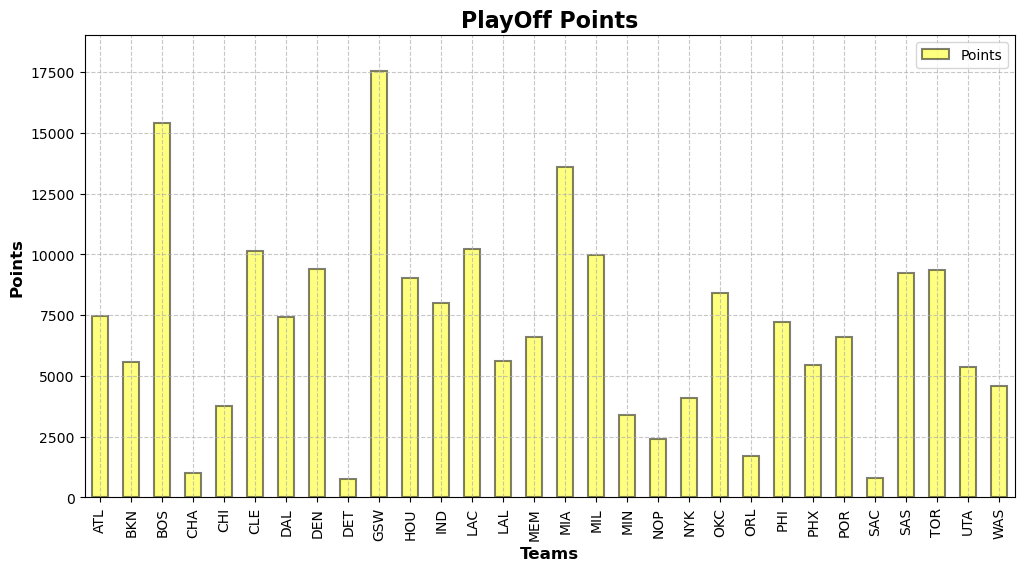

In [30]:
#Plotting a graph for the playoff points 

pl = team_points_df.plot(kind='bar', color='yellow', alpha=0.5, figsize=(12, 6), 
                         linewidth=1.5, edgecolor='black')

plt.ylim(0,19000)

# Add title and labels
plt.title('PlayOff Points', fontsize=16, weight='bold')
plt.xlabel('Teams', fontsize=12, weight='bold')
plt.ylabel('Points', fontsize=12 , weight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Figures/PlayOff Points.png")

In [31]:
team_pointsreg_df

Team
ATL    104273
BKN    101822
BOS    104092
CHA     98906
CHI     99644
CLE    104221
DAL    103930
DEN    106749
DET     95959
GSW    105977
HOU    106541
IND    104742
LAC    110430
LAL    105238
MEM     98221
MIA    103537
MIL    107983
MIN    100537
NOH      7814
NOP     95881
NYK     98637
OKC    107875
ORL     95534
PHI    103453
PHX    104723
POR    105060
SAC    104674
SAS    102334
TOR    106107
UTA     99196
WAS    103235
Name: Points, dtype: int64

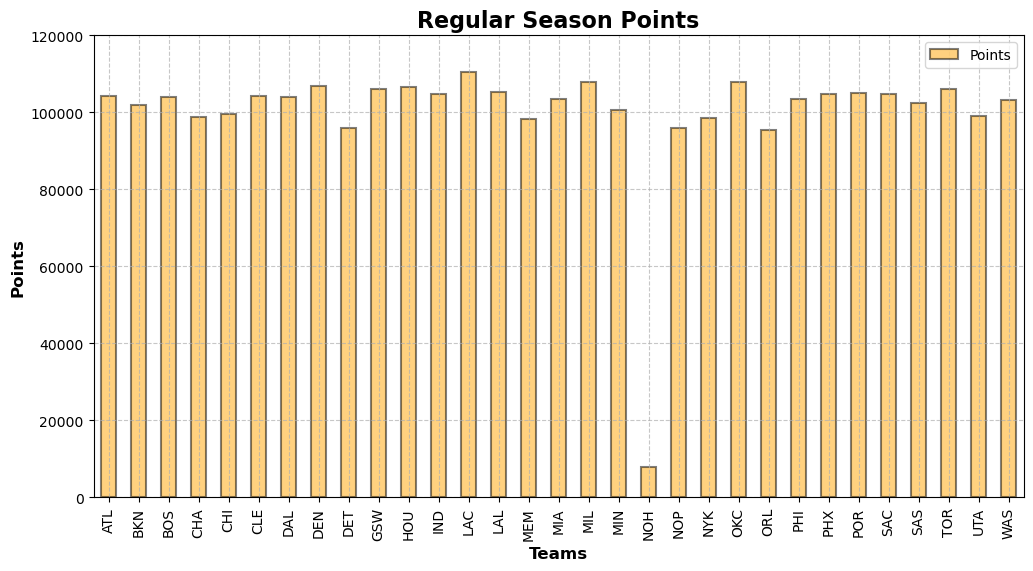

In [32]:
#Plotting a graph for the regular season points 

team_pointsreg_df.plot(kind='bar', color='orange', alpha=0.5, figsize=(12, 6),linewidth=1.5, edgecolor='black')

plt.ylim(0,120000)

# Add title and labels
plt.title('Regular Season Points', fontsize=16, weight='bold')
plt.xlabel('Teams', fontsize=12, weight='bold')
plt.ylabel('Points', fontsize=12 , weight='bold')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Figures/Regular Season Points.png")

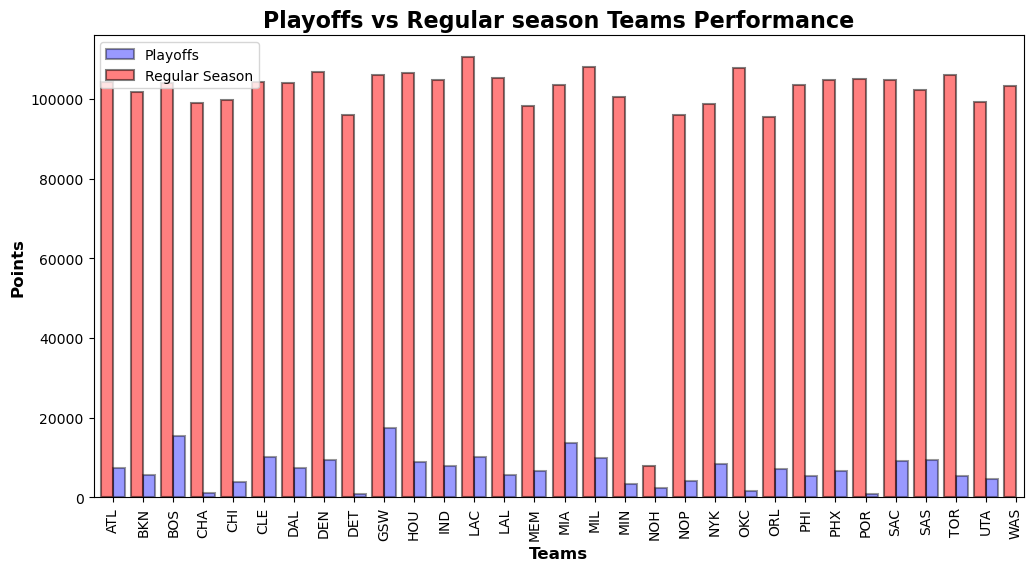

In [33]:
#Plotting a graph for the playoff and regular season points 

data1 = team_points_df
data2 = team_pointsreg_df

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first bar plot
data1.plot(kind='bar', ax=ax, color='blue', alpha=0.4, position=0, width=0.4, label='Playoffs', 
           linewidth=1.5, edgecolor='black')

# Plot the second bar plot
data2.plot(kind='bar', ax=ax, color='red', alpha=0.5, position=1, width=0.4, label='Regular Season',
           linewidth=1.5, edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Teams', fontsize=12, weight='bold')
ax.set_ylabel('Points', fontsize=12, weight='bold')
ax.set_title('Playoffs vs Regular season Teams Performance', fontsize=16, weight='bold')
ax.legend()
plt.show()
